### ARATHI. M

# Business Case: Yulu - Hypothesis Testing

## Business Problem: 

#### The company wants to understand and process the data coming out of data engineering pipelines:
   #### • Clean, sanitize and manipulate data to get useful features out of raw fields
   #### • Make sense out of the raw data and help the data science team to build forecasting models on it


## Problem Statements

* Study the data set for data cleaning and preprocessing
* Detect outliers in the data set using describe function and boxplot
* Understand the distribution of data for the quantitative attributes
* Understand correlations of data among the quantitative attributes
* Univariate, bivariate & multivariate analysis to check relationship between different features
* In depth analysis with feature engineering¶
* Chi-square test to check if Weather is dependent on the season
* Chi-square test to check if Weather is workingday on the season
* ANNOVA to check if No. of cycles rented is similar or different in different season   
* ANNOVA to check if No. of cycles rented is similar or different in different weather

## About dataset:
 
* data - tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – Unique Id for a particular route schedule
* route_type – Transportation type
* FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs         along the way
* Carting: Handling system consisting of small vehicles (carts)
* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center - Source ID of trip origin
* source_name - Source Name of trip origin
*	destination_cente – Destination ID
*	destination_name – Destination Name
*	od_start_time – Trip start time
*	od_end_time – Trip end time
*	start_scan_to_end_scan – Time taken to deliver from source to destination
*	is_cutoff – Unknown field
*	cutoff_factor – Unknown field
*	cutoff_timestamp – Unknown field
*	actual_distance_to_destination – Distance in Kms between source and destination warehouse
*	actual_time – Actual time taken to complete the delivery (Cumulative)
*	osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map         (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
*	osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes           usual traffic, distance through major and minor roads) (Cumulative)
*	factor – Unknown field
*	segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
*	segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
*	segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
*	segment_factor – Unknown field



#### Importing libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [22]:
data=pd.read_csv('bike_sharing.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
data.shape

(10886, 12)

In [5]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Find outliers in the numerical variables

In [5]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


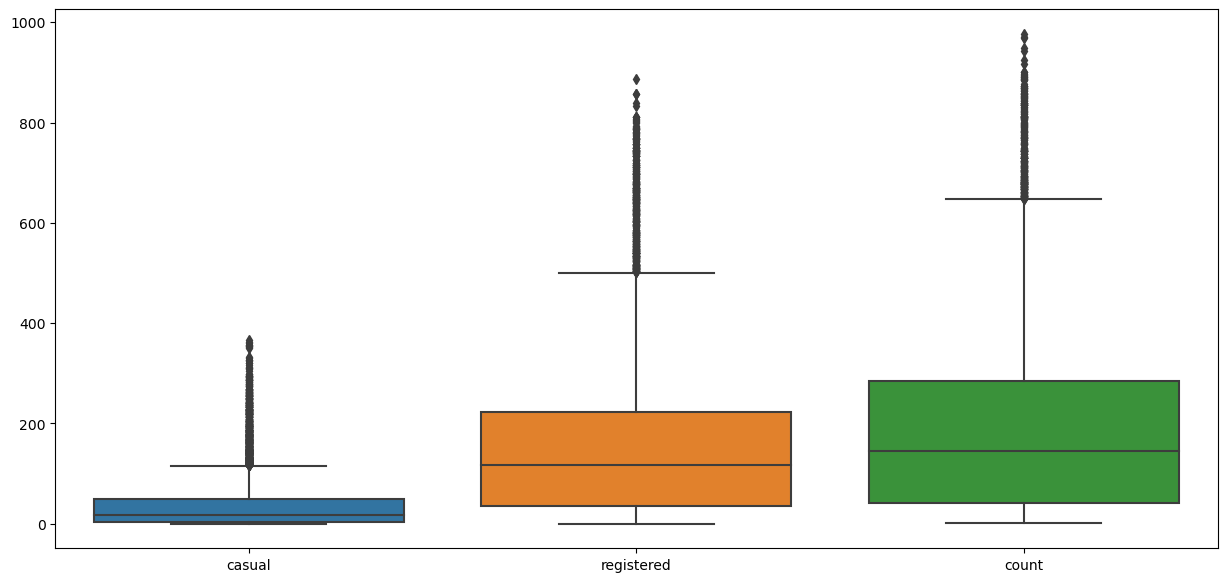

In [4]:
plt.figure(figsize=(15,7))
attrs=['casual','registered','count']
sns.boxplot(data=data[['casual','registered','count']])
plt.show()

In [6]:
da=data.copy()
attrs=['casual','registered','count']
for i in attrs:
 q1=data[i].quantile(.25)
 q3=data[i].quantile(.75)
 iqr=q3-q1
 lower=q1-(1.5*iqr)
 upper=q3+(1.5*iqr)
 print('lower limit of',i,'=',lower)
 print('upper limit of',i,'=',upper)
 print('----------------------------------------------------------------')
 da=da[~((da[i]<lower)|(da[i]>upper))]
da

lower limit of casual = -63.5
upper limit of casual = 116.5
----------------------------------------------------------------
lower limit of registered = -243.0
upper limit of registered = 501.0
----------------------------------------------------------------
lower limit of count = -321.0
upper limit of count = 647.0
----------------------------------------------------------------


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


By removing outlayers we can see that 9744 rows insted of 10886

In [7]:
for col in data.columns:
    print(col,':',data[col].unique())

datetime : ['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
season : [1 2 3 4]
holiday : [0 1]
workingday : [0 1]
weather : [1 2 3 4]
temp : [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
atemp : [14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]
humidity : [ 81  80  75  86  76  77 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
for col in data.columns:
    print(col,':',data[col].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


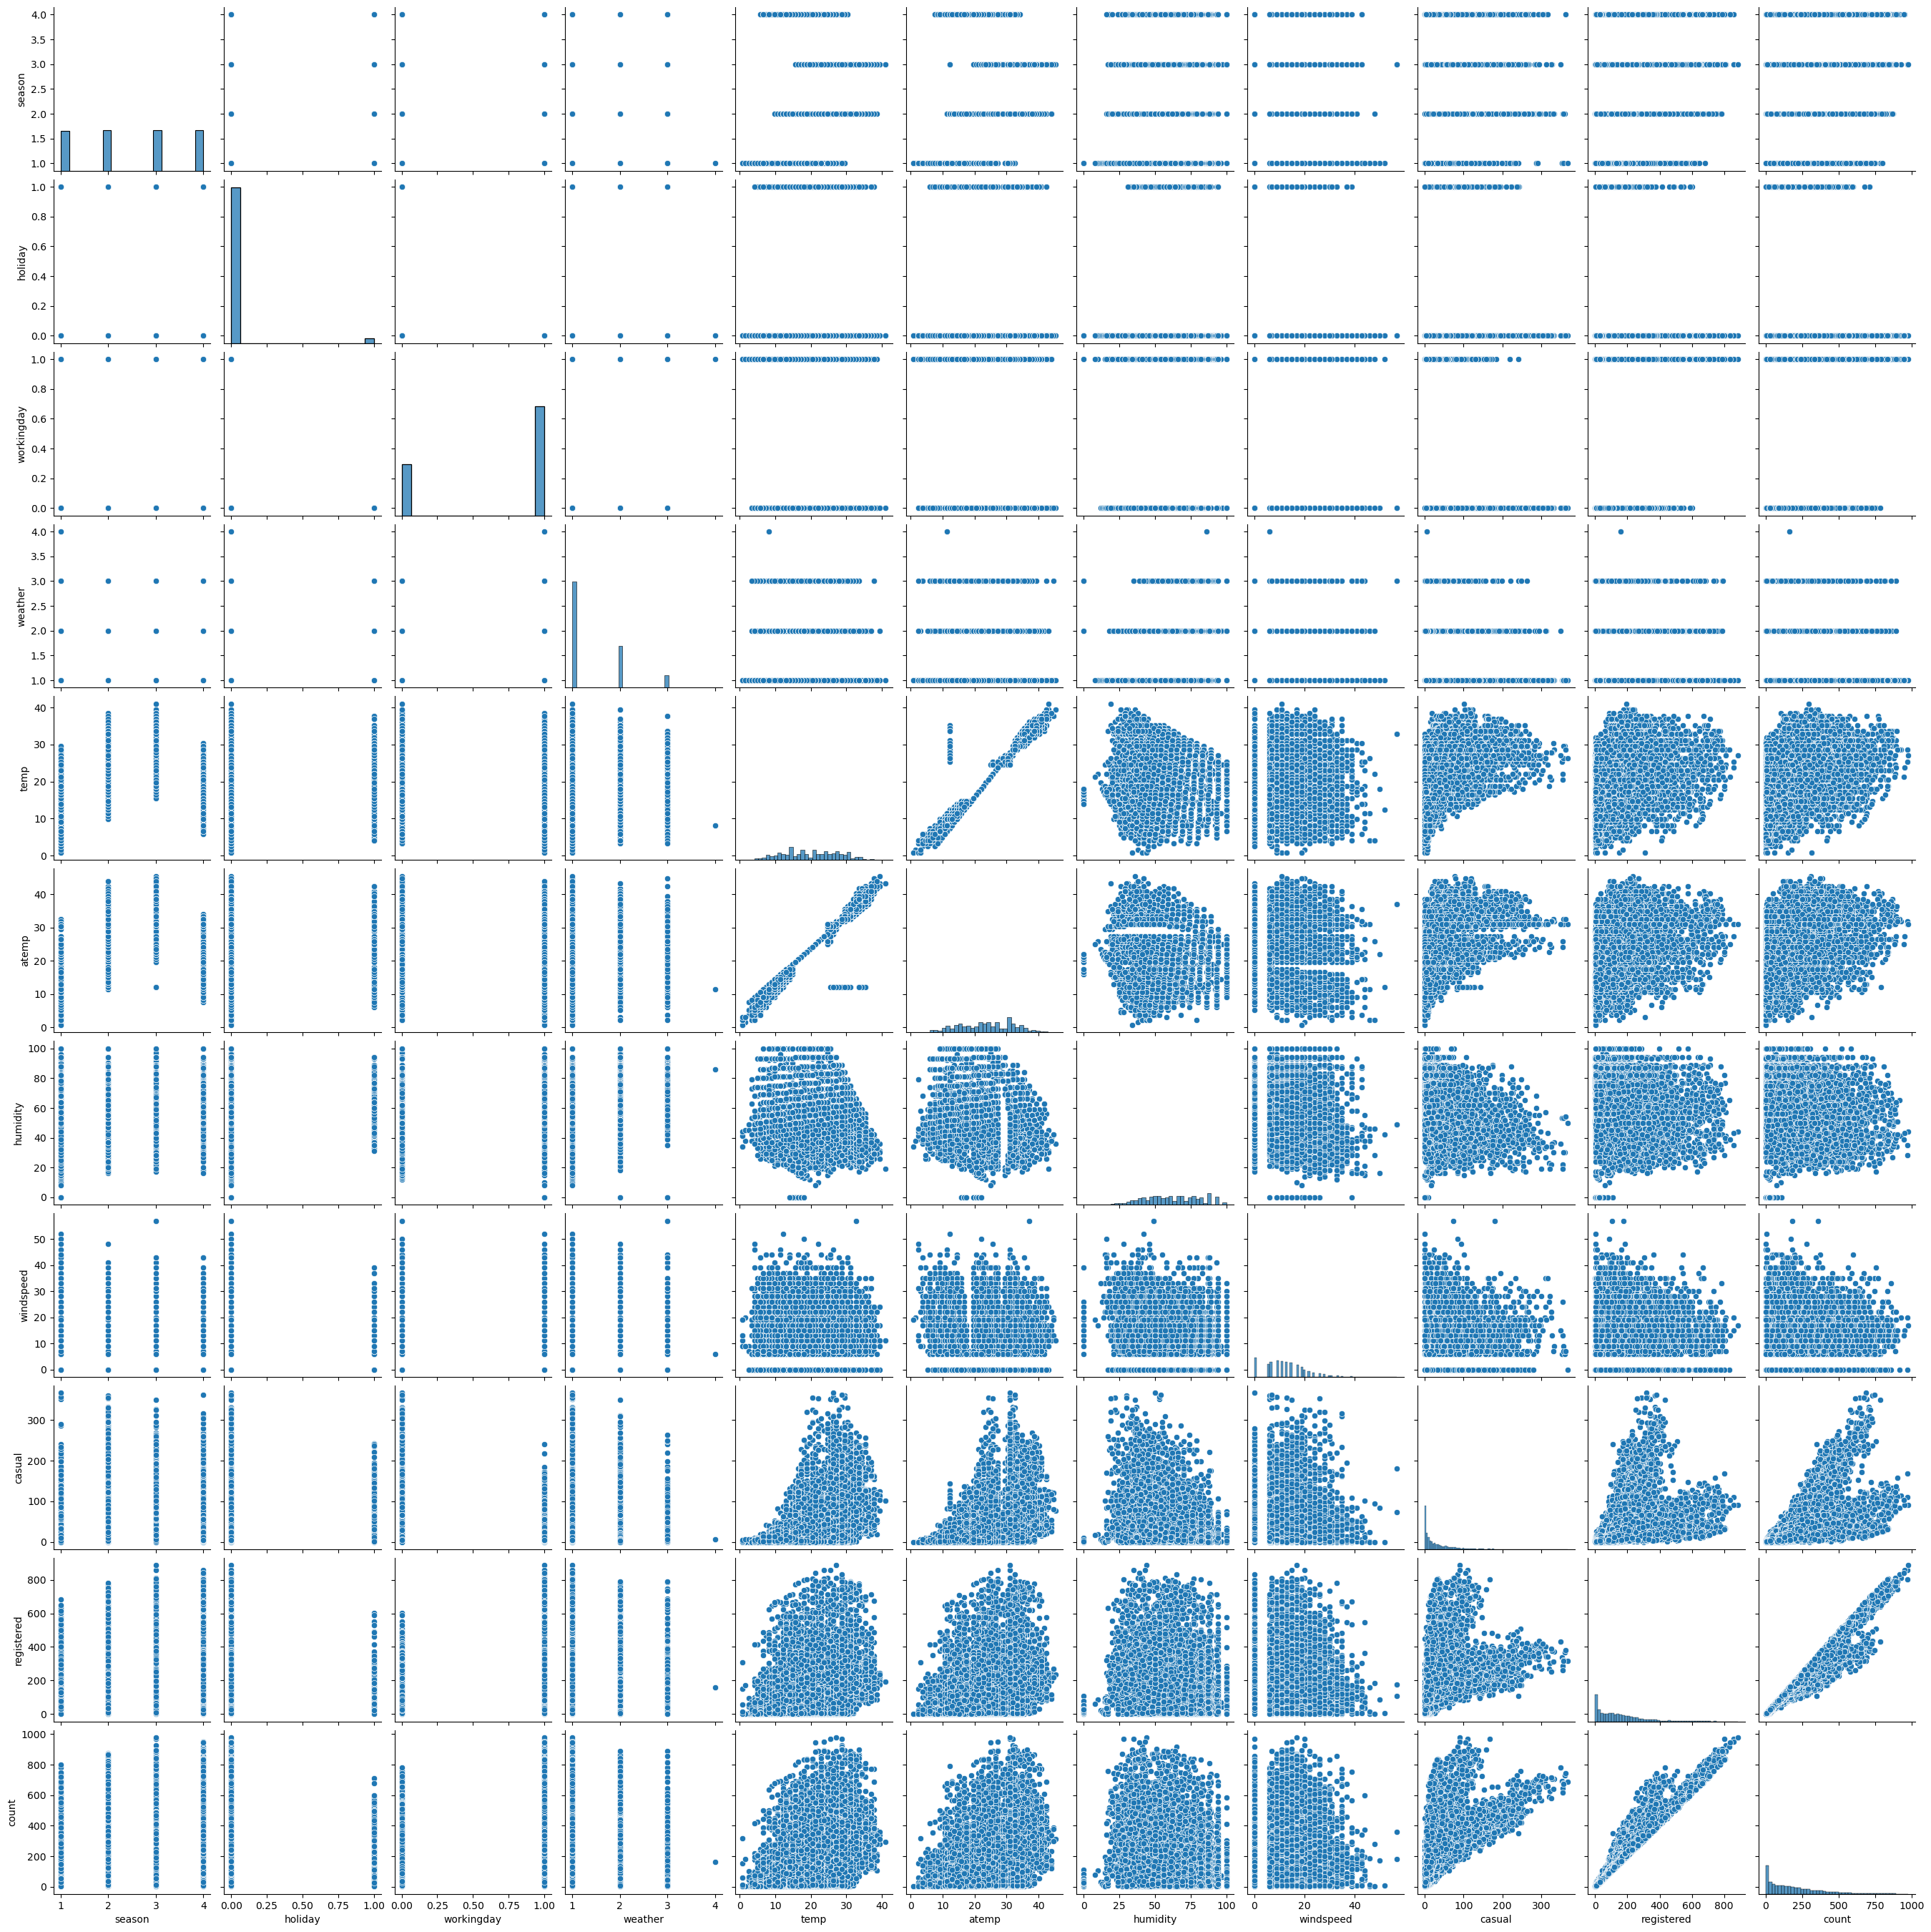

In [10]:
sns.pairplot(data)

In [11]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


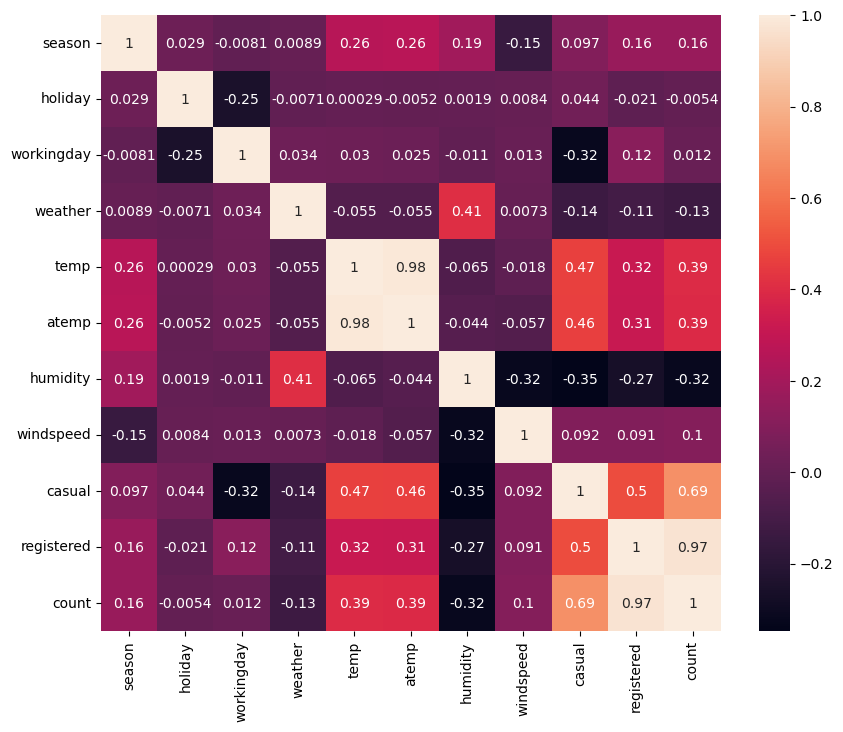

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

## No of user count in each season

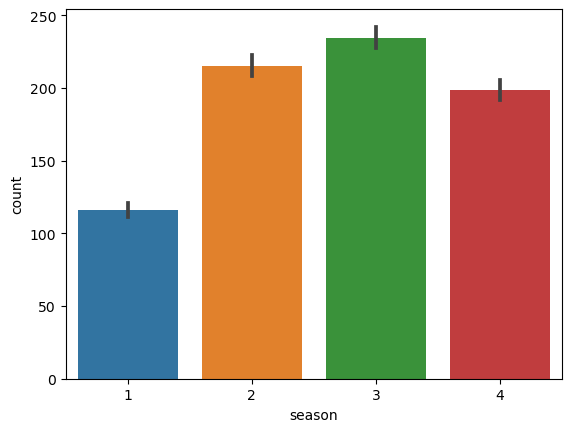

In [24]:
sns.barplot(x='season',y='count',data=data)
plt.show()

* Season 3 have more number of users than other seasons.

In [16]:
dsc=data.groupby('season')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
dsc

,season,count
0,3,234.417124
1,2,215.251372
2,4,198.988296
3,1,116.343261


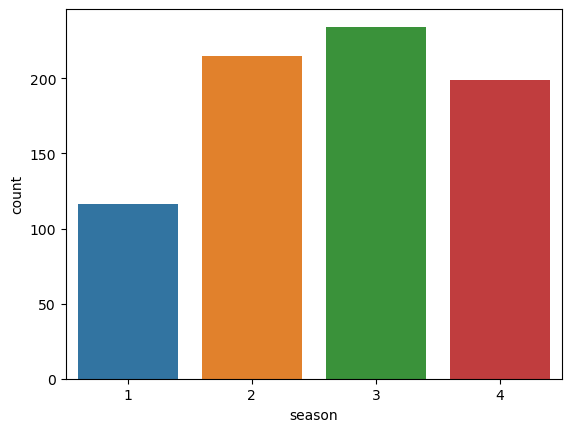

In [17]:
sns.barplot(x='season',y='count',data=dsc)
plt.show()

## No of user count in holiday for each season

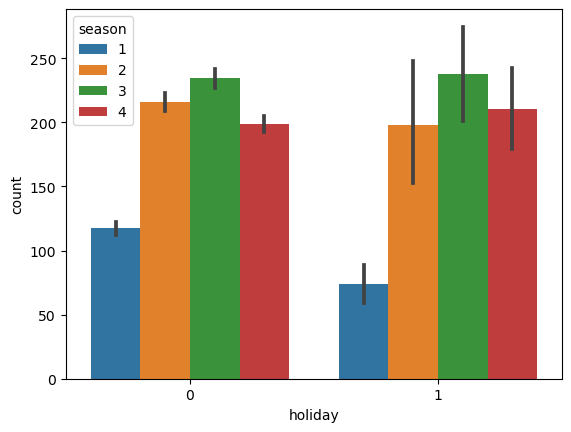

In [26]:
sns.barplot(x='holiday',y='count',data=data,hue='season')
plt.show()

* Holidays of season 3 have more number of users.
* Working days of season 3 have more number of users.

In [18]:
dhc=data.groupby('holiday')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
dhc

,holiday,count
0,0,191.741655
1,1,185.877814


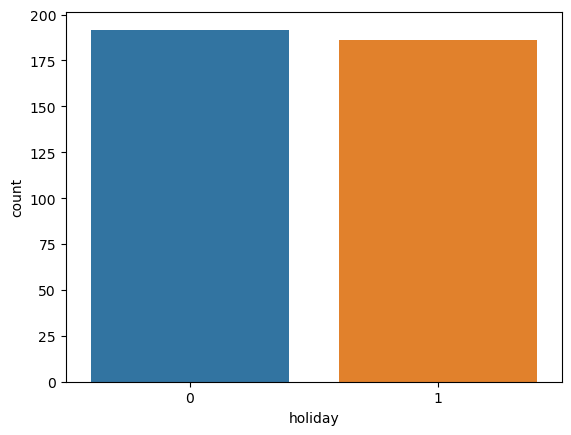

In [19]:
sns.barplot(x='holiday',y='count',data=dhc)
plt.show()

## No of user count in workingdays for each season

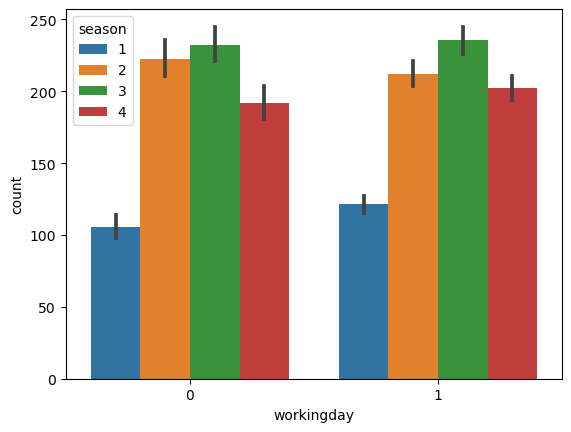

In [27]:
sns.barplot(x='workingday',y='count',data=data,hue='season')
plt.show()

* Working days of season 3 have more number of users.

In [20]:
dwc=data.groupby('workingday')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
dwc

,workingday,count
0,1,193.011873
1,0,188.506621


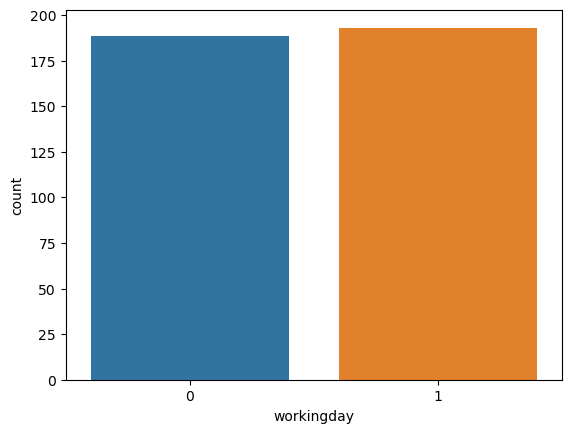

In [21]:
sns.barplot(x='workingday',y='count',data=dwc)
plt.show()

## No of user count across each weather for each season

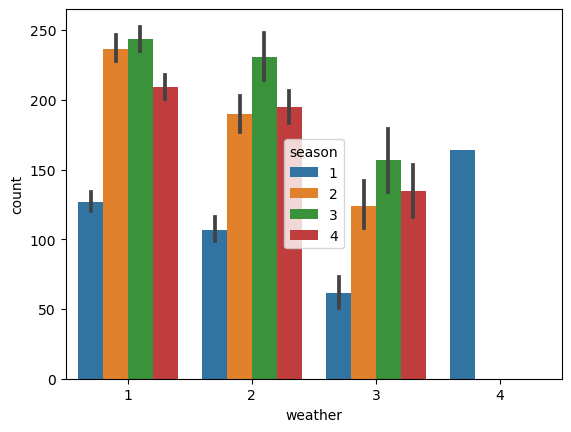

In [30]:
sns.barplot(x='weather',y='count',data=data,hue='season')
plt.show()

* For both weather 1,2 and 3 the more users belongs to season 3.
* For weather 4 more users belongs to season 1.

In [14]:
x1=data.groupby('weather')['count'].sum().reset_index()
x1

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


In [15]:
y1=data.groupby('weather')['count'].mean().reset_index()
y1


,weather,count
0,1,205.236791
1,2,178.955540
2,3,118.846333
3,4,164.000000


<AxesSubplot:xlabel='weather', ylabel='count'>

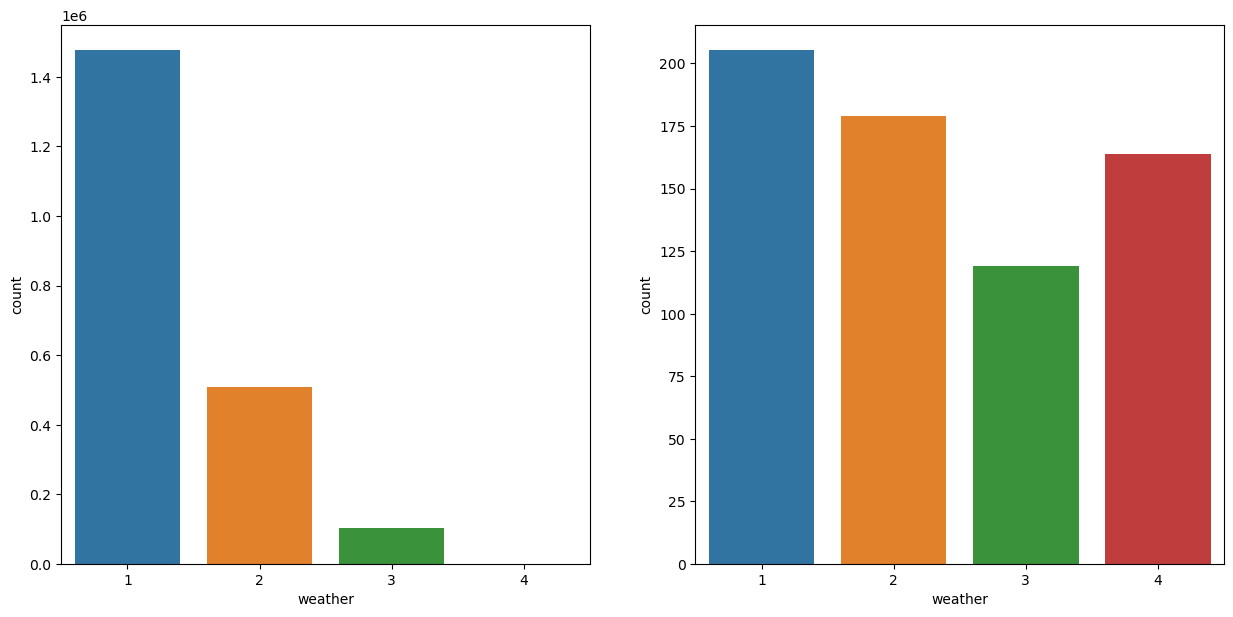

In [16]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='weather',y='count',data=x1)
plt.subplot(122)
sns.barplot(x='weather',y='count',data=y1)


* Weather 1 have more users than others.

## No of user count for  each temp

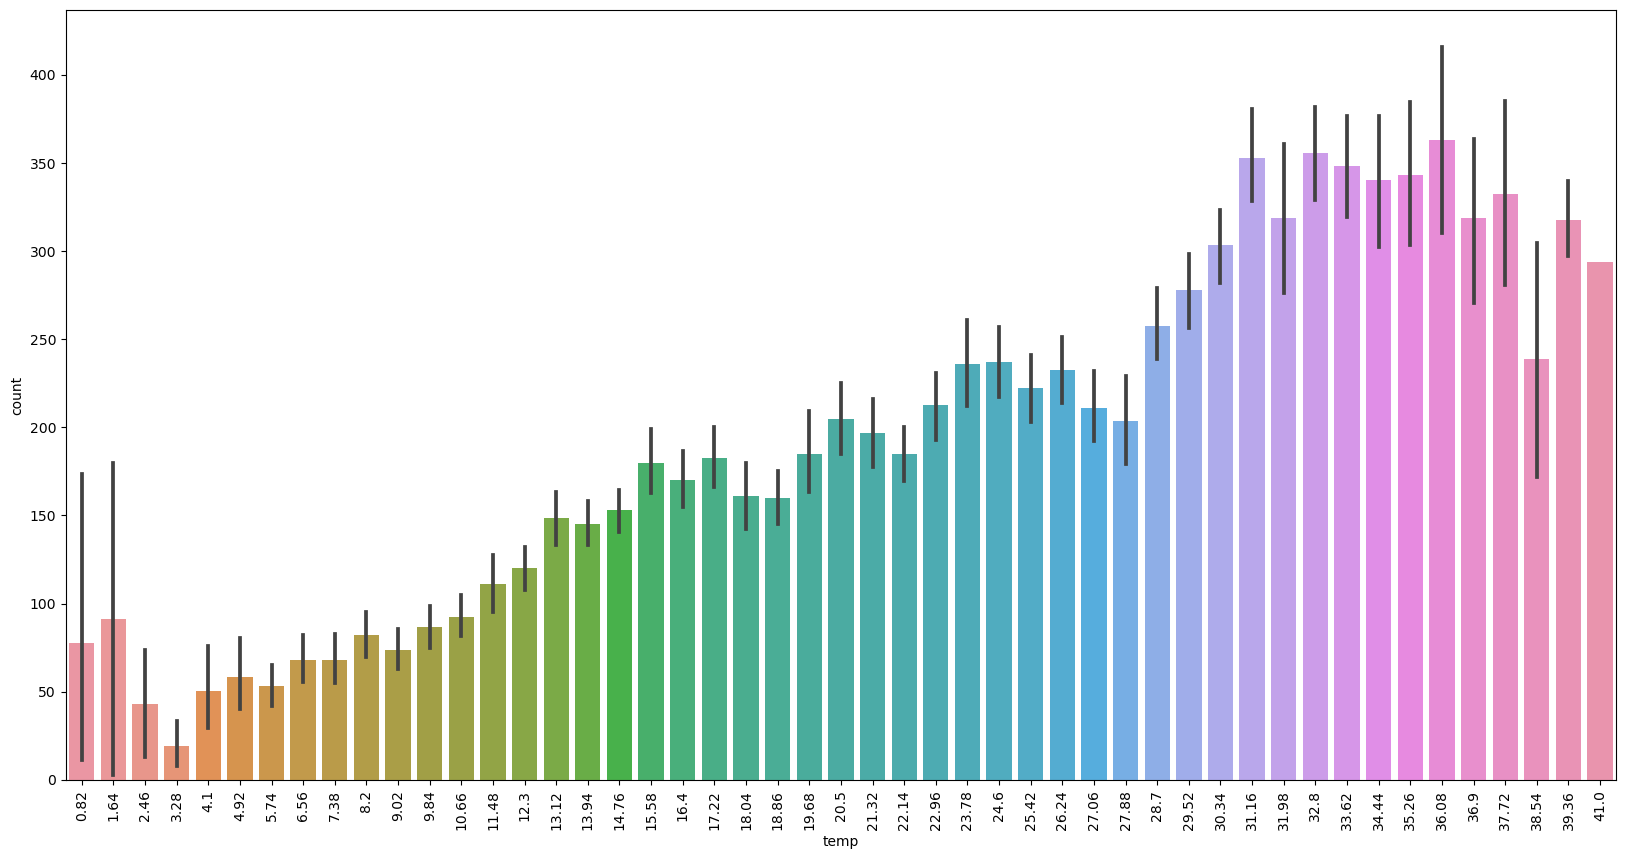

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x='temp',y='count',data=data)
plt.xticks(rotation=90)
plt.show()

* More users prefer the temperature 36.08
* The lowest number users comes for bikes is in the temperature 3.28

In [22]:
ds=data.groupby('temp')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
ds

,temp,count
0,36.08,362.869565
1,32.80,355.623762
2,31.16,352.801653
3,33.62,348.323077
4,35.26,342.934211
5,34.44,340.225000
6,37.72,332.176471
7,36.90,318.717391
8,31.98,318.683673
9,39.36,317.833333


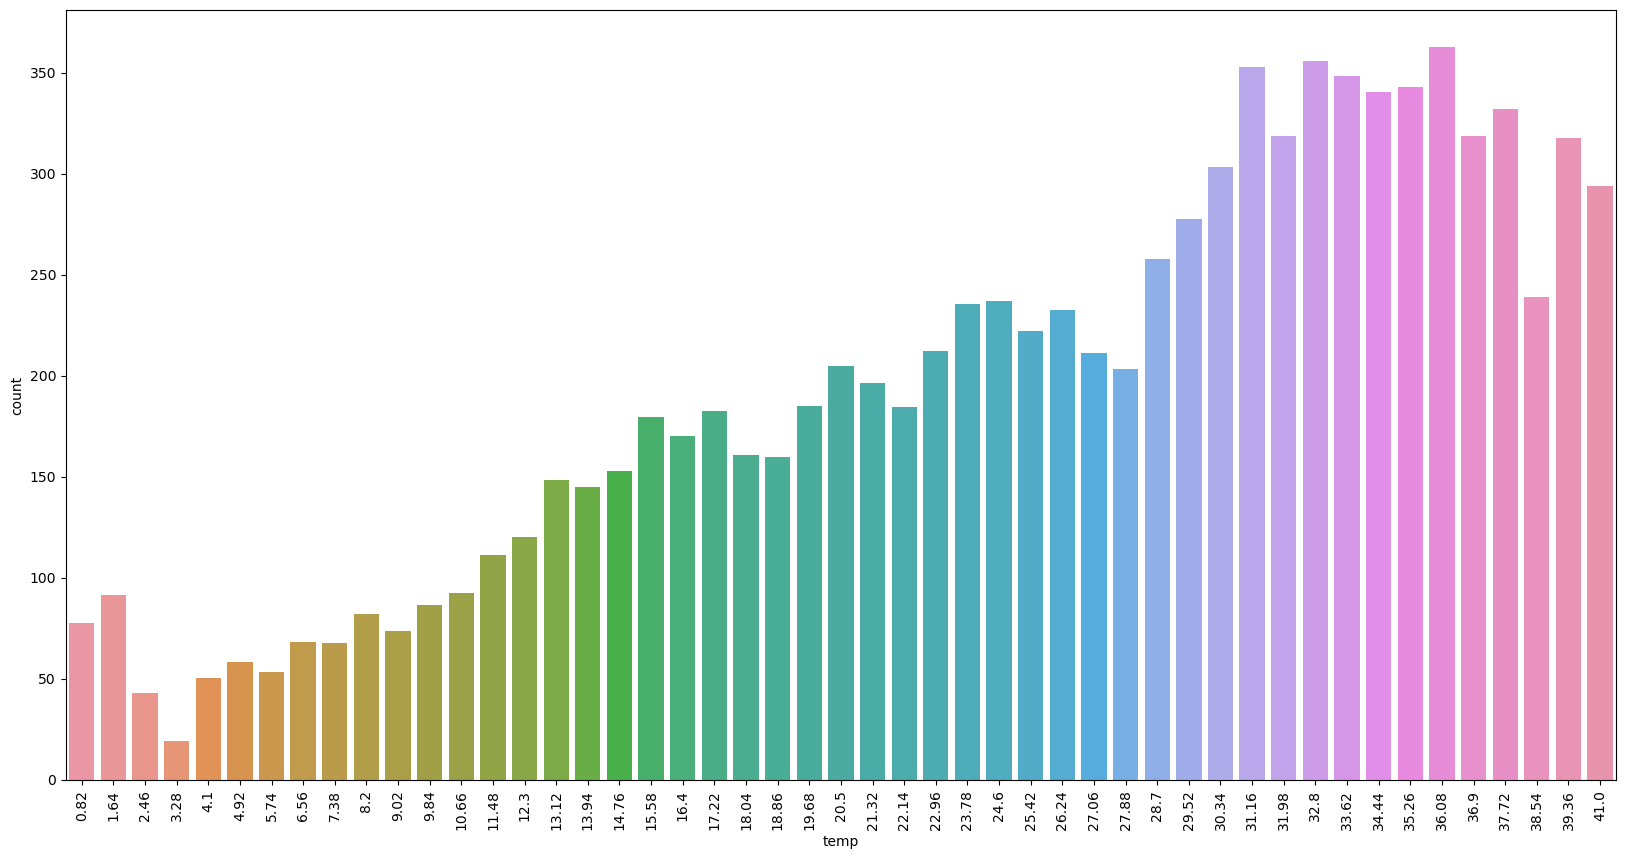

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x='temp',y='count',data=ds)
plt.xticks(rotation=90)
plt.show()

## No of user count for each atemp

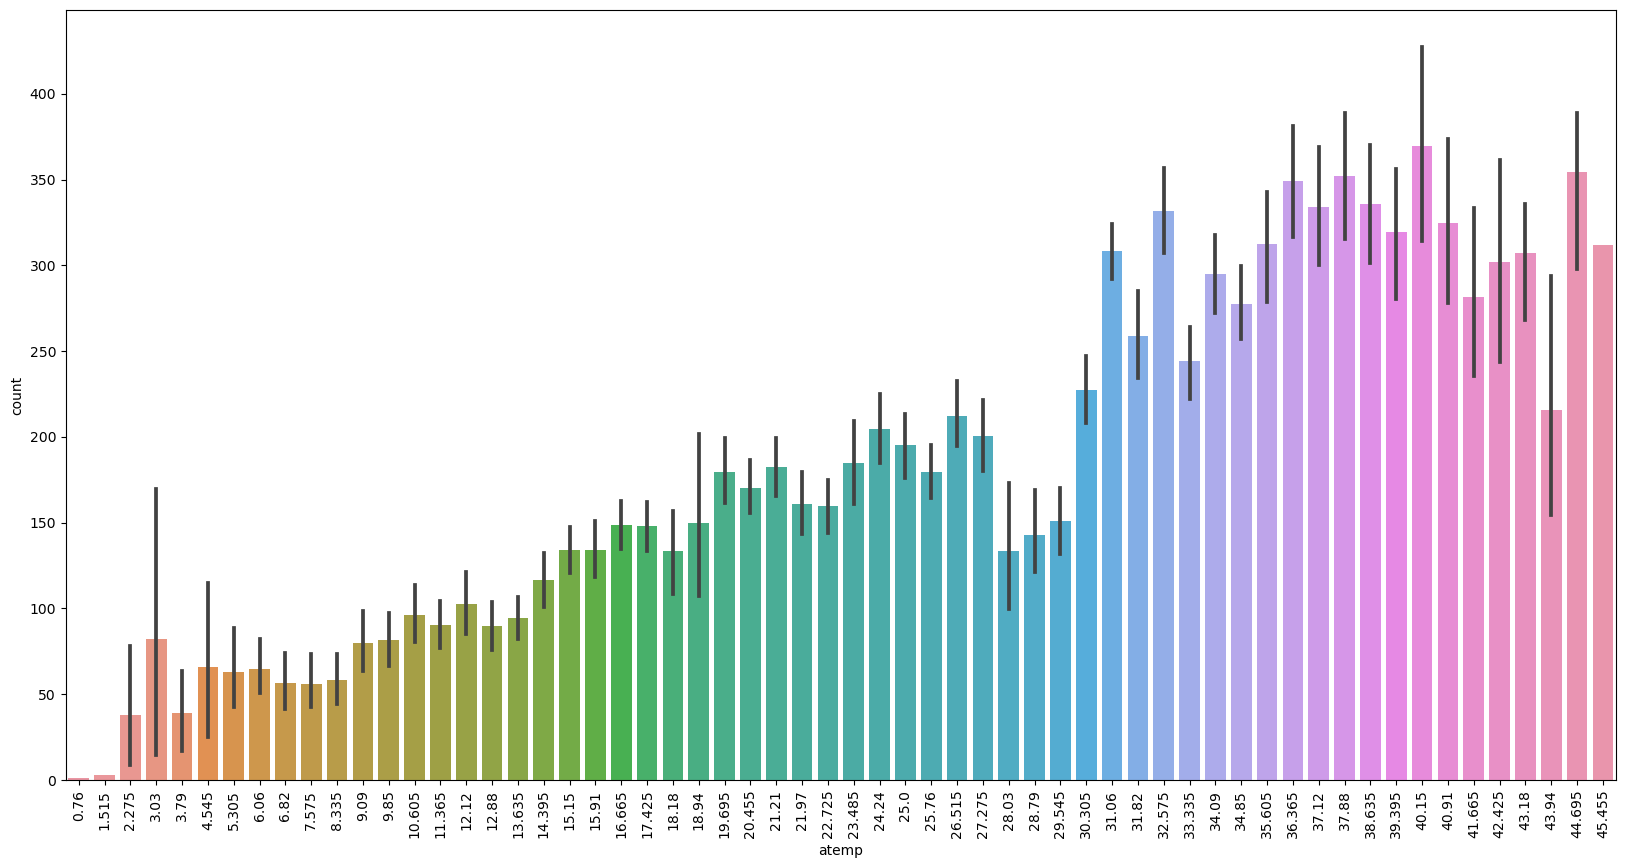

In [52]:
plt.figure(figsize=(20,10))
sns.barplot(x='atemp',y='count',data=data)
plt.xticks(rotation=90)
plt.show()

* More people use bikes when they feel 40.15 temperature.

In [24]:
das=data.groupby('atemp')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
das

,atemp,count
0,40.150,369.577778
1,44.695,354.333333
2,37.880,351.835052
3,36.365,349.243902
4,38.635,335.783784
5,37.120,334.144068
6,32.575,331.746324
7,40.910,324.512821
8,39.395,319.194030
9,35.605,312.144654


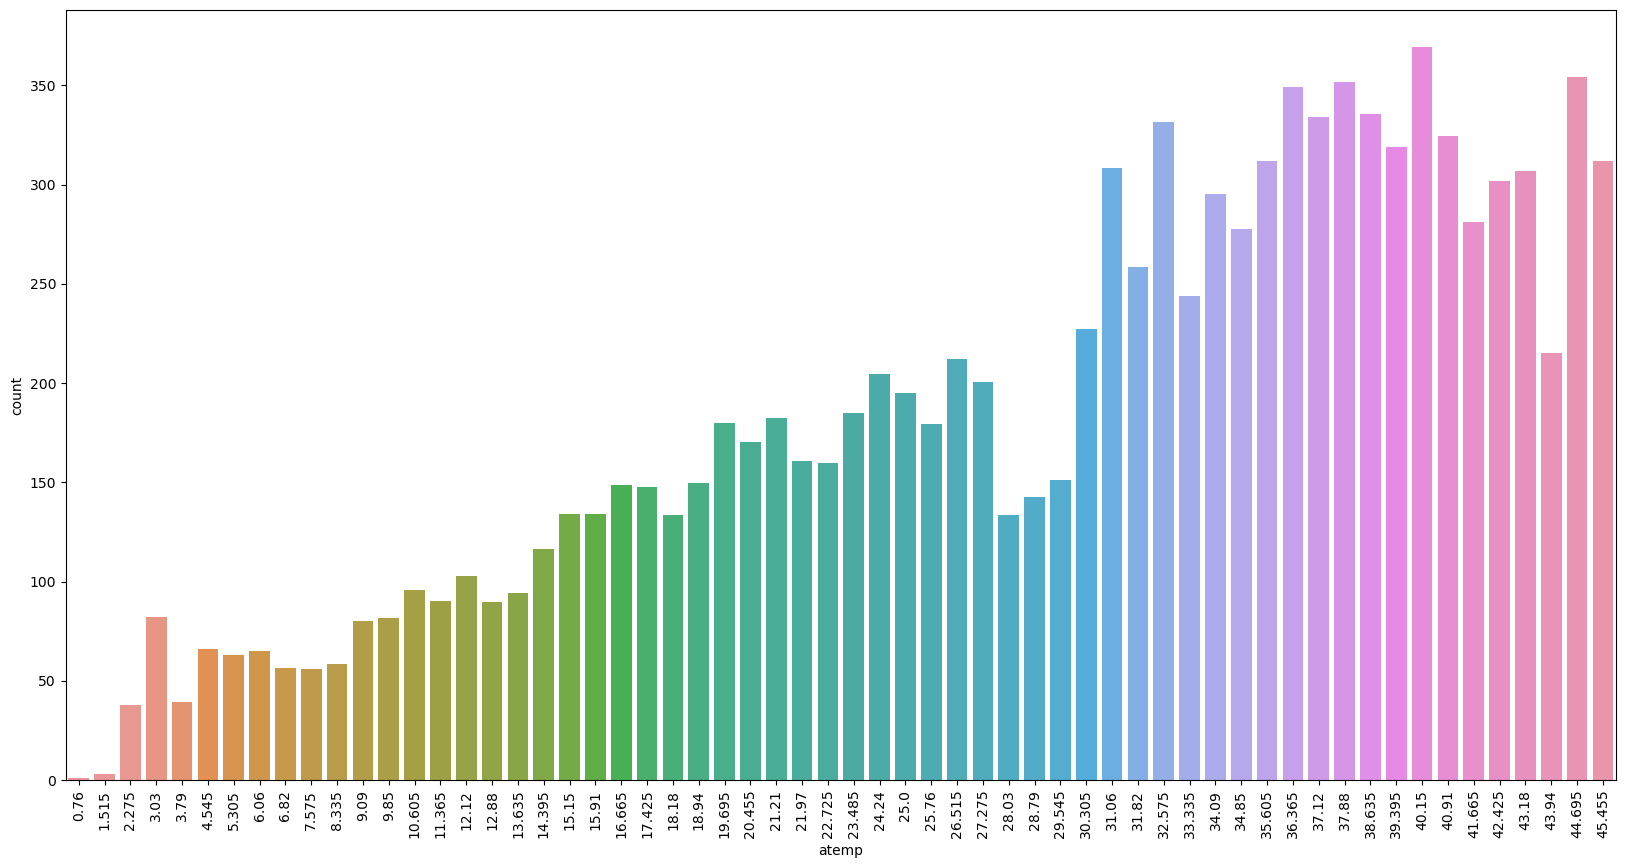

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x='atemp',y='count',data=das)
plt.xticks(rotation=90)
plt.show()

## No of user count for each humidity level

<Figure size 2000x1000 with 0 Axes>

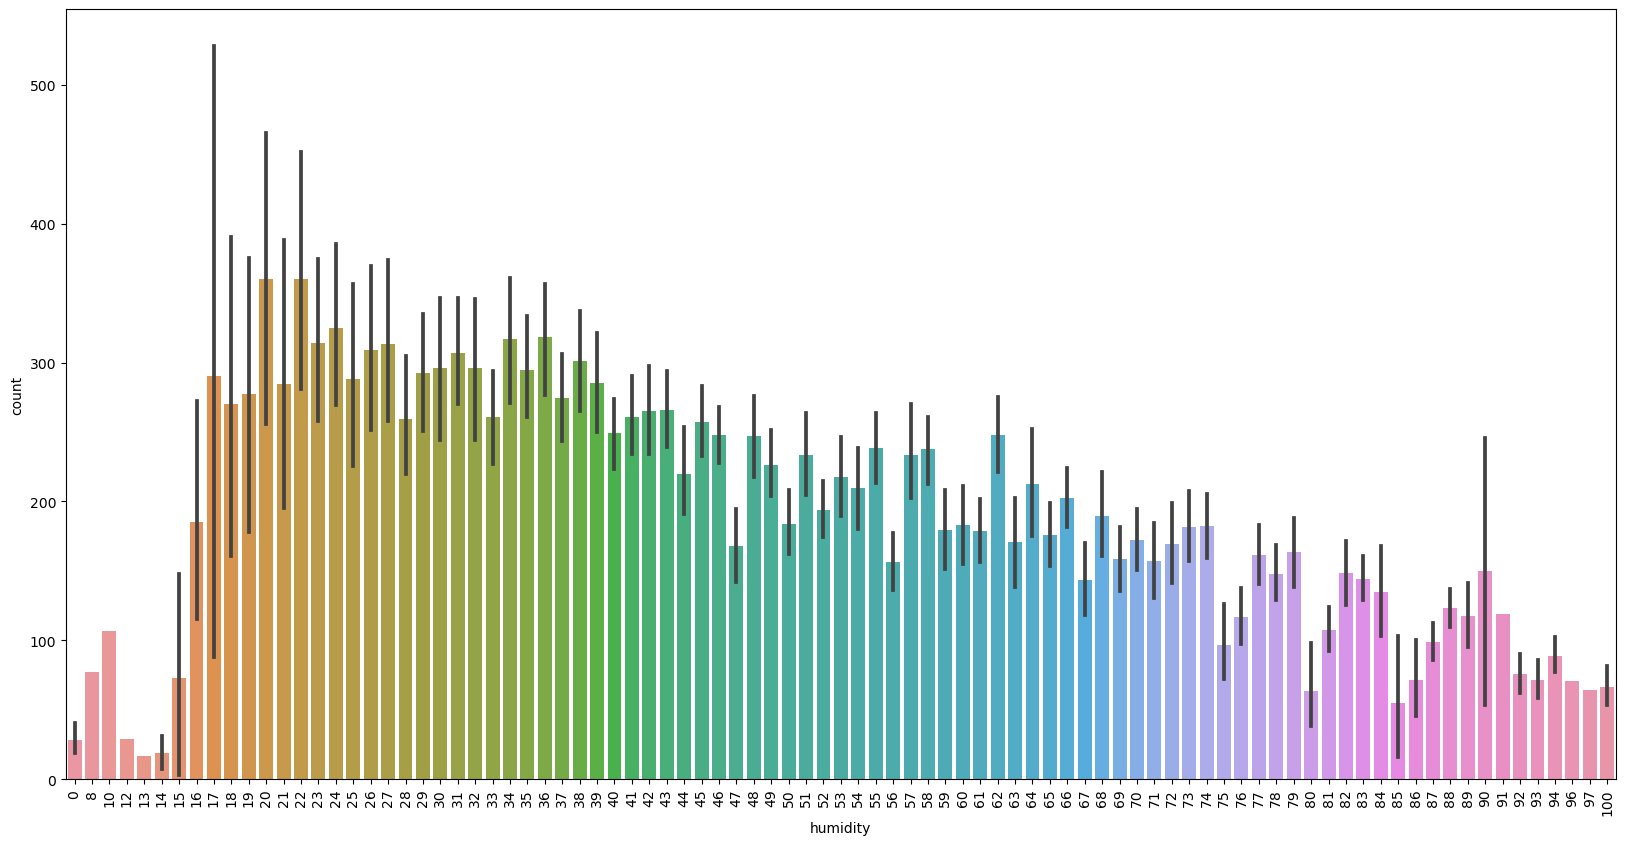

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(x='humidity',y='count',data=data)
plt.xticks(rotation=90)
plt.show()

* More people use bikes when the humidity level is in between the range 20 - 23

In [26]:
dh=data.groupby('humidity')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
dh

,humidity,count
0,20,360.200000
1,22,360.111111
2,24,324.891892
3,36,318.581395
4,34,316.741935
...,...,...
84,85,55.000000
85,12,29.000000
86,0,28.318182
87,14,19.000000


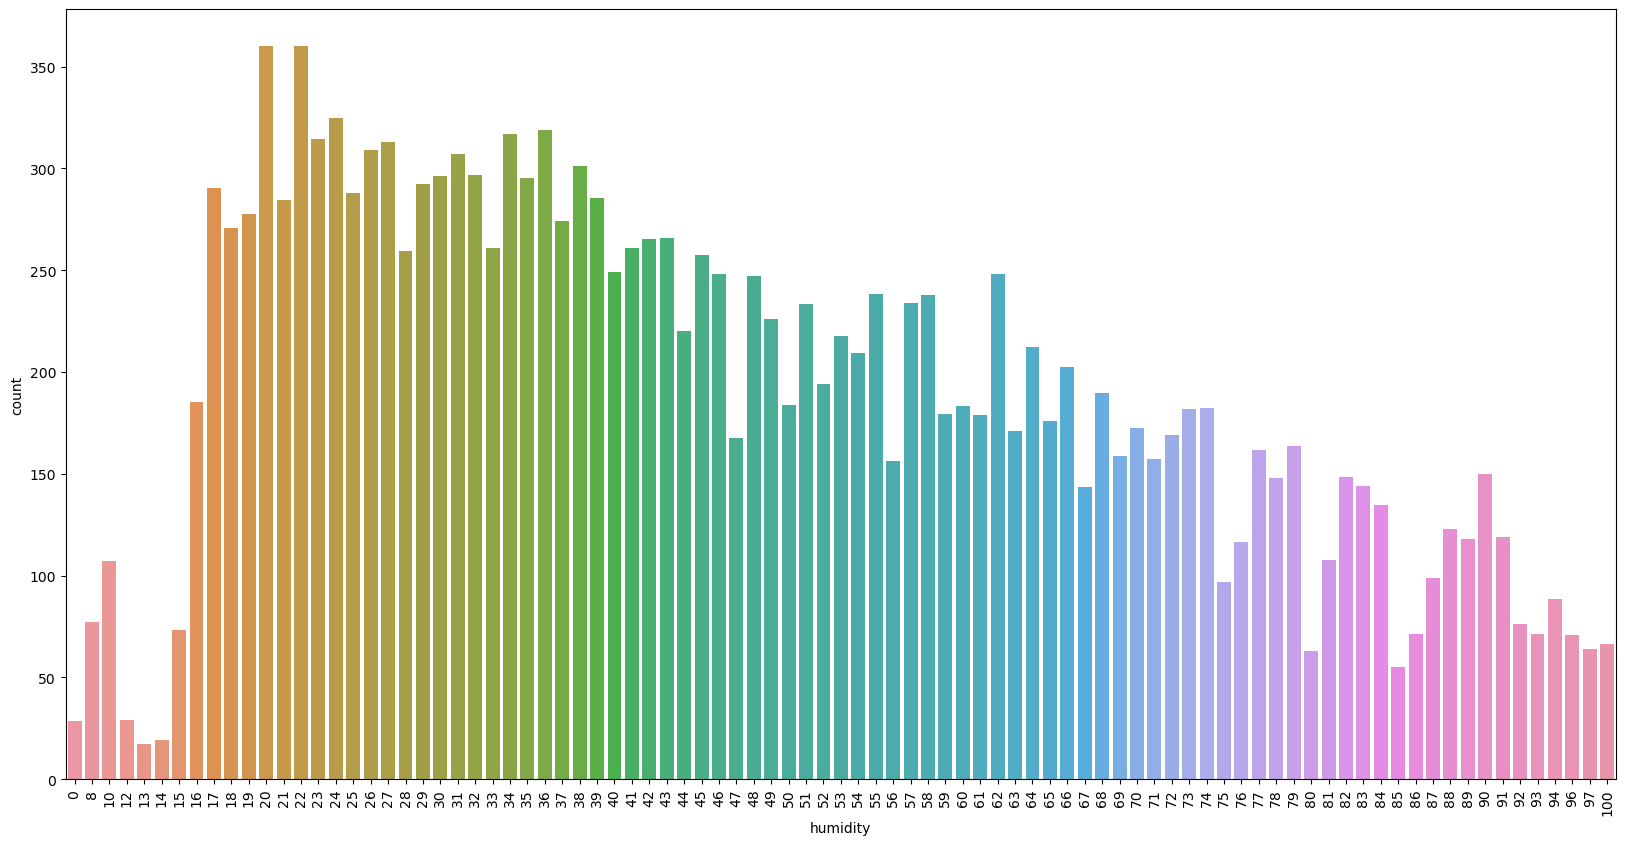

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='humidity',y='count',data=dh)
plt.xticks(rotation=90)
plt.show()

## No of user count for each windspeed level

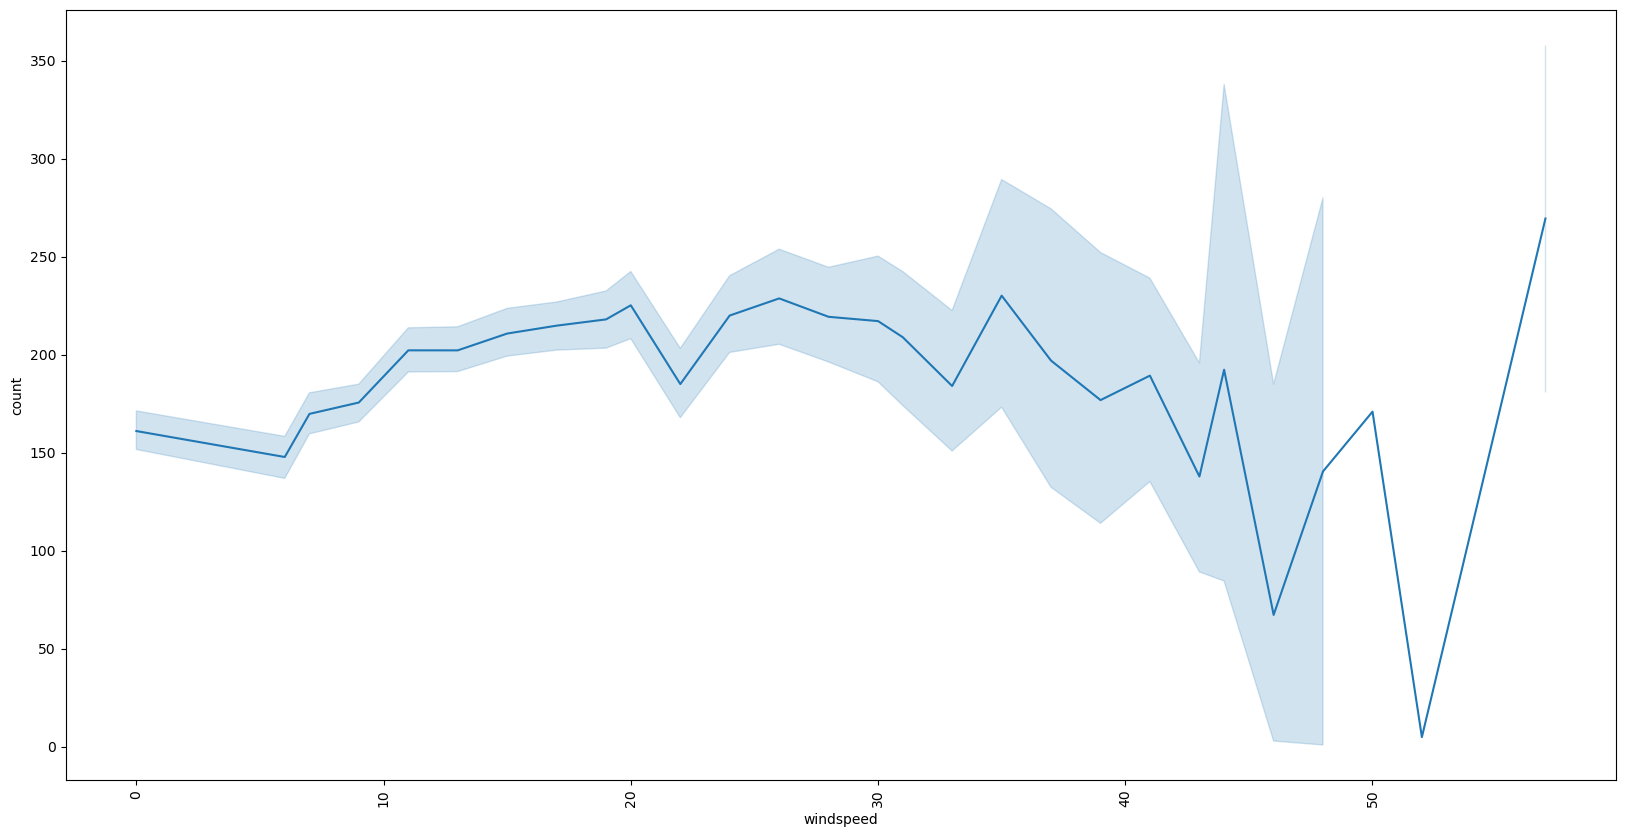

In [30]:
plt.figure(figsize=(20,10))
sns.lineplot(x='windspeed',y='count',data=data)
plt.xticks(rotation=90)
plt.show()

* More people prefer wind speed is greater than 50. 

In [28]:
dw=data.groupby('windspeed')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
dw

,windspeed,count
0,56.9969,269.500000
1,35.0008,230.155172
2,26.0027,228.744681
3,19.9995,225.235772
4,23.9994,220.010949
5,27.9993,219.363636
6,19.0012,218.051775
7,30.0026,217.171171
8,16.9979,214.847087
9,15.0013,210.833507


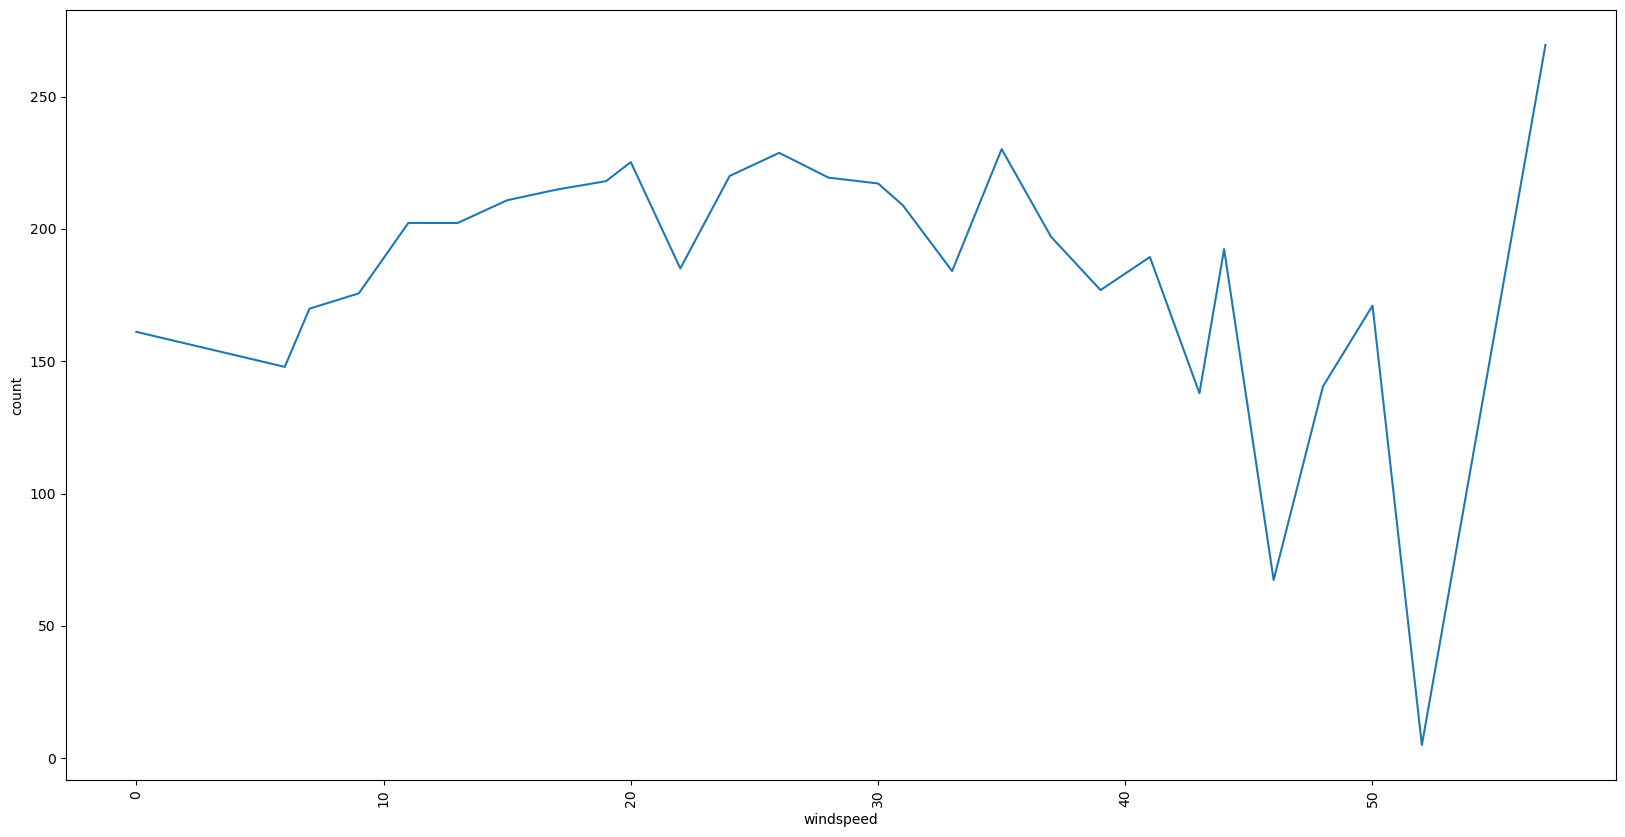

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(x='windspeed',y='count',data=dw)
plt.xticks(rotation=90)
plt.show()

 ## Mean temperature for each season

In [31]:
dst=data.groupby('season')['temp'].mean().sort_values(ascending=False).to_frame().reset_index()
dst

,season,temp
0,3,28.789111
1,2,22.823483
2,4,16.649239
3,1,12.530491


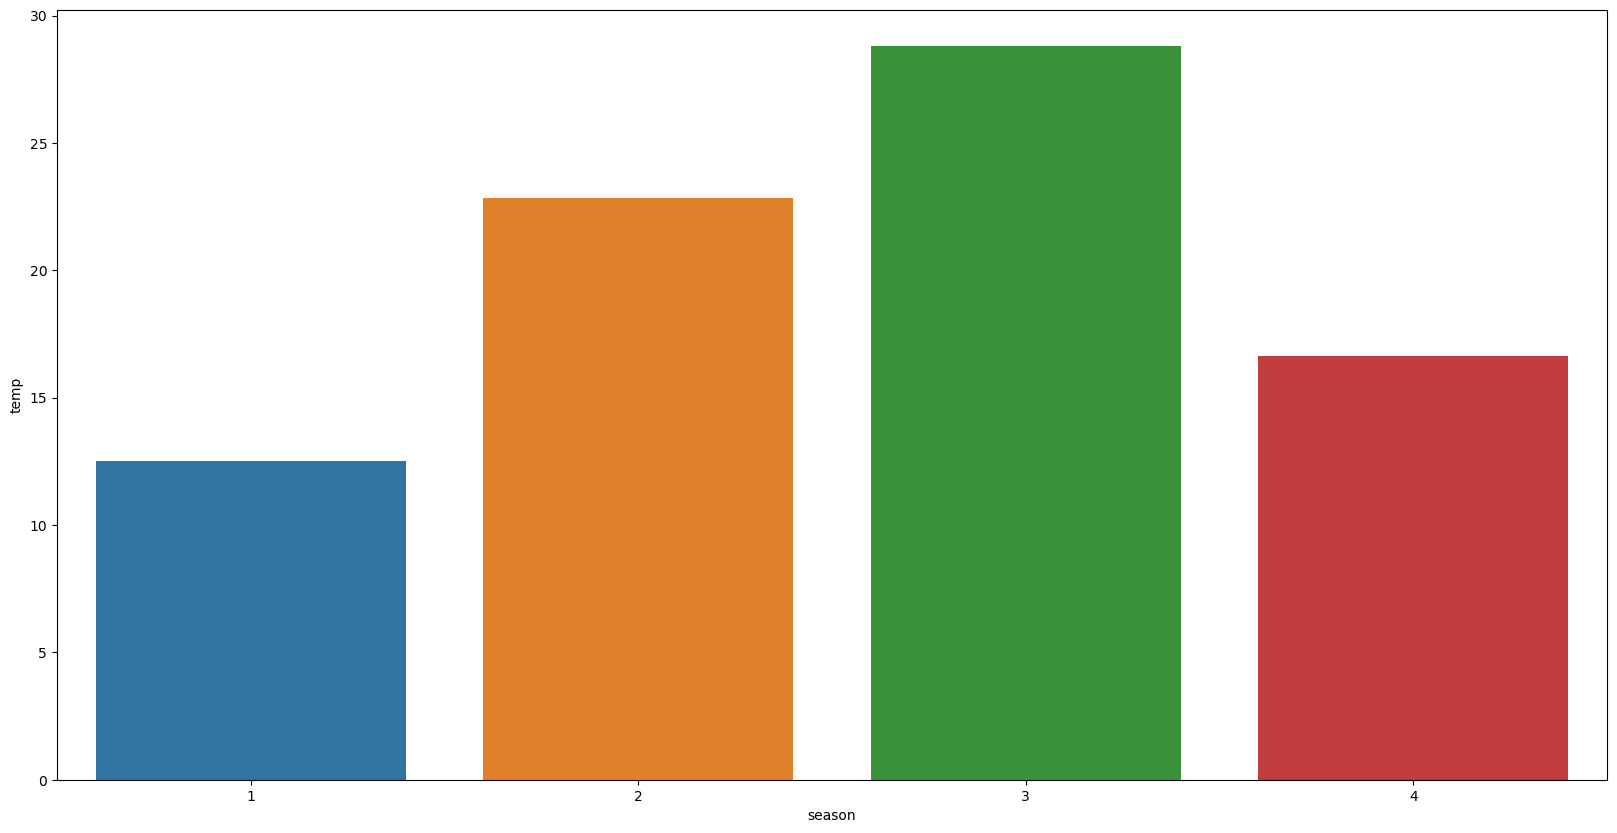

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x='season',y='temp',data=dst)
plt.show()

* Season 3 has high temperature compared to other seasons.

## Adding day,day_name,month and year columns

In [23]:
data['datetime']=pd.to_datetime(data['datetime'])

In [24]:
data['day']=data['datetime'].dt.day

In [25]:
data['day_name'] = data['datetime'].dt.day_name()

In [26]:
data['month']=data['datetime'].dt.month

In [27]:
data['year']=data['datetime'].dt.year

In [28]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,day_name,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,Saturday,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,Saturday,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,Saturday,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,Saturday,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,Saturday,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,Wednesday,12,2012
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19,Wednesday,12,2012
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19,Wednesday,12,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,19,Wednesday,12,2012


## Number of users for each year

In [33]:
dy=data.groupby('year')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
dy

,year,count
0,2012,238.560944
1,2011,144.223349


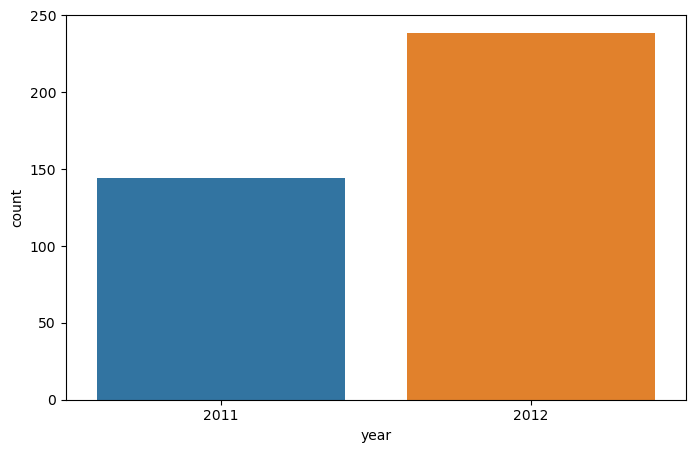

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='count',data=dy)
plt.show()

* There is huge increase in number of users in the year 2012.

## Number users for each month

In [14]:
dym=data.groupby('month')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
dym

,month,count
0,6,242.031798
1,7,235.325658
2,8,234.118421
3,9,233.805281
4,10,227.699232
5,5,219.459430
6,11,193.677278
7,4,184.160616
8,12,175.614035
9,3,148.169811


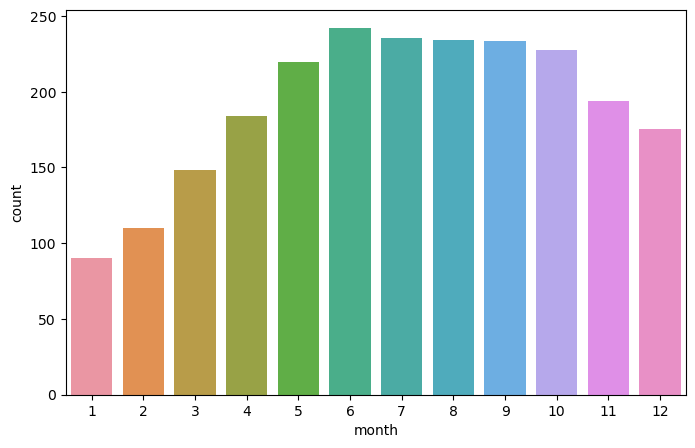

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x='month',y='count',data=dym)
plt.show()

Number of users is highest in month June.

## Number of users of each season of each year

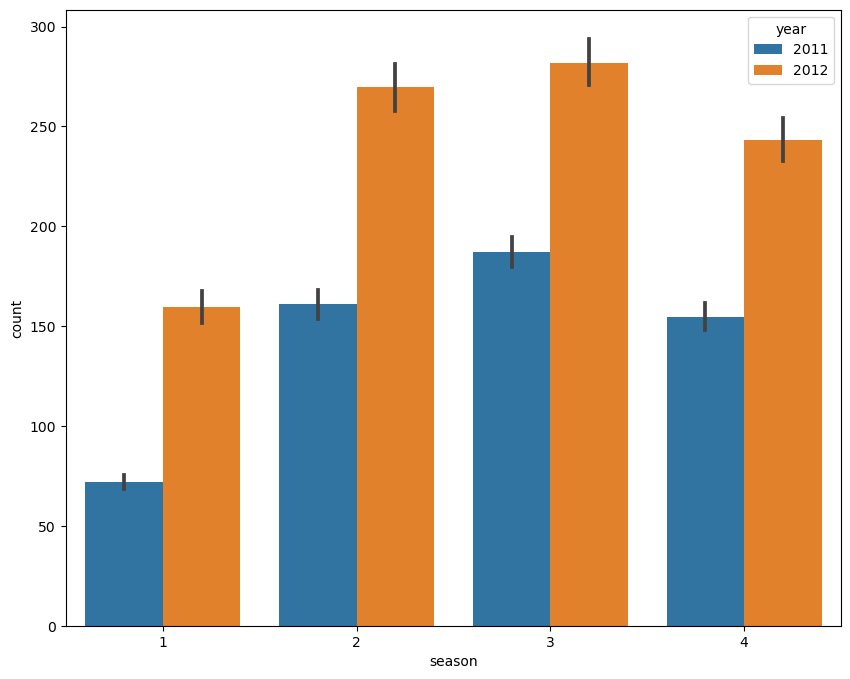

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='count',hue='year',data=data)
plt.show()

* All the seasons of 2012 have more number of users than 2011.
* Third season have highest number of users.

## No of user count in each weekdays

In [29]:
x1=data.groupby('day_name')['count'].mean().to_frame('mean').reset_index()
x1

,day_name,mean
0,Friday,197.844343
1,Monday,190.390716
2,Saturday,196.665404
3,Sunday,180.839772
4,Thursday,197.296201
5,Tuesday,189.723847
6,Wednesday,188.411348


[]

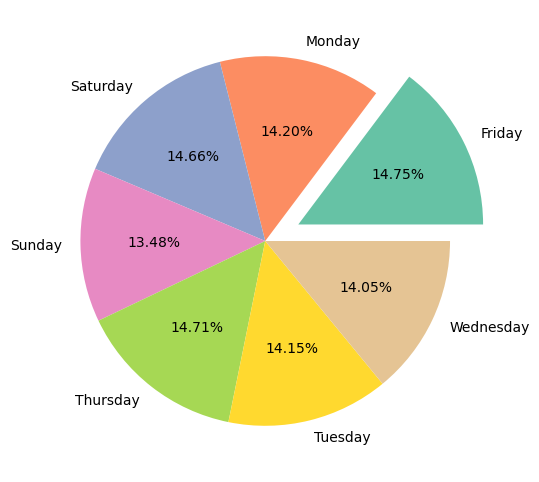

In [32]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(data=x1, x=x1['mean'], colors=palette_color, labels=x1['day_name'], explode=(0.2,0,0,0,0,0,0),autopct='%0.2f%%')
plt.plot()

* We can see that almost every day no.of users are same
* Most and least mean users are in respective days are friday and sunday


## No.of users across every season in casual and registered users

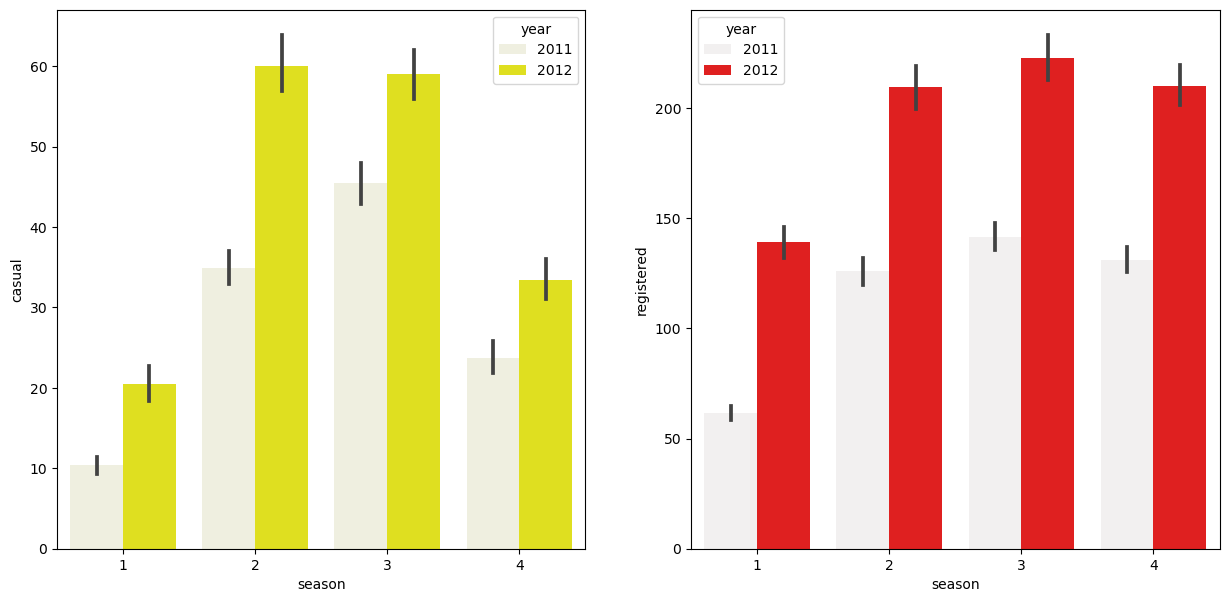

In [33]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='season',y='casual',hue='year',data=data,color='yellow')
plt.subplot(122)
sns.barplot(x='season',y='registered',hue='year',data=data,color='red')
plt.show()

* Both registerd and casual users are increse with increse in year in every seasons

## Temprature varies across diffrent month in each season

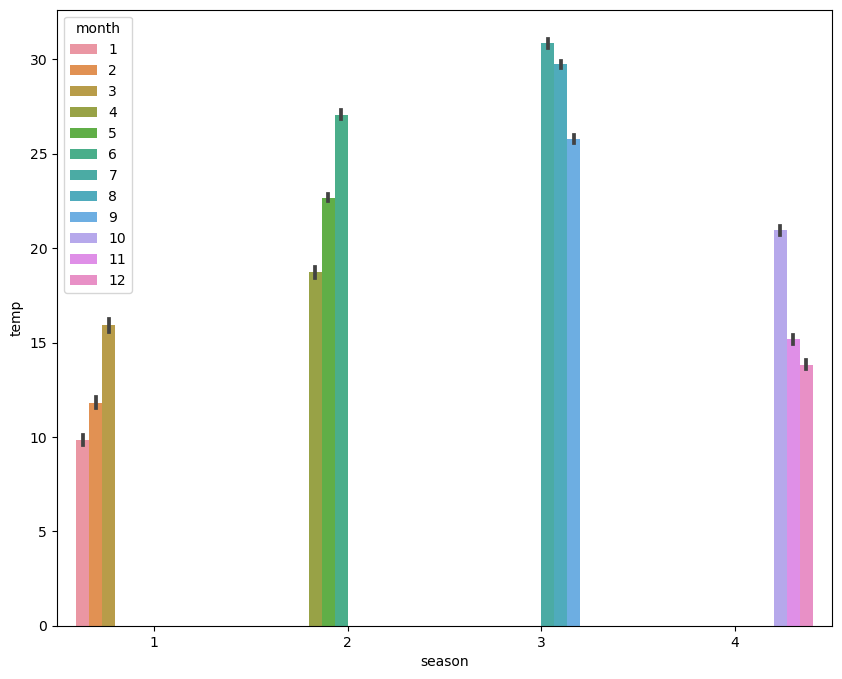

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='temp',hue='month',data=data)
plt.show()

* Season 3 is the highest temprature seasons
    june, 
    july,
    August
* season 1 is the lowest temprature seasons
    january, 
    february, 
    March

## No.of users across season in each month

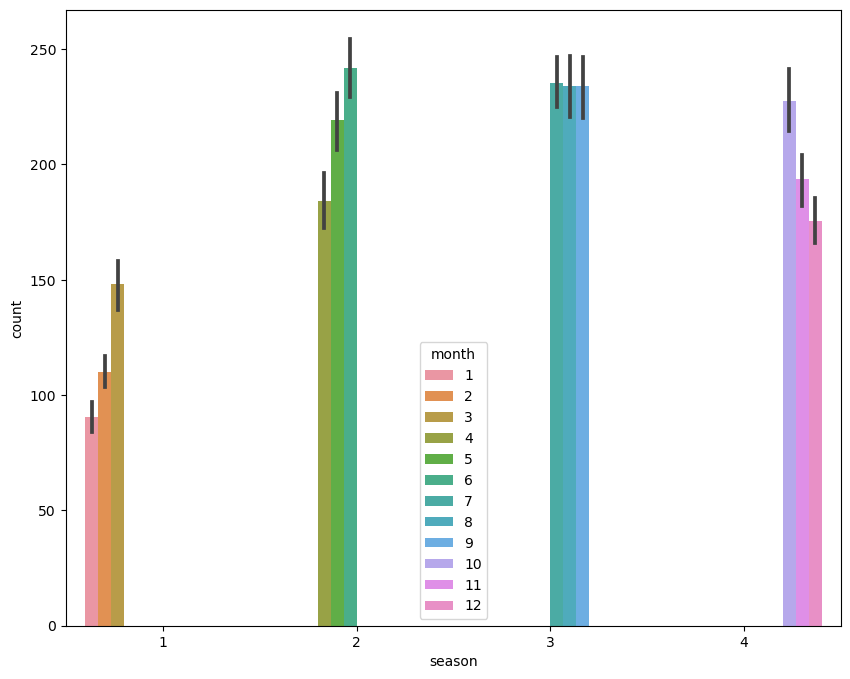

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='count',hue='month',data=data)
plt.show()

* For season 1: March month have high number of users.
* For season 2: July month have high number of users.
* For season 3: July month have high number of users.
* For season 4: October month have high number of users.

## Converting features like temp,atemp,humidity,windspeed to bins

In [12]:
data['temp_bin']=pd.cut(data['temp'],bins=[-1,10,20,30,45],labels=['low_temp','medium_temp','normal_temp','high_temp'])
data['atemp_bin']=pd.cut(data['atemp'],bins=[-1,10,20,30,46],labels=['low_atemp','medium_atemp','normal_atemp','high_atemp'])
data['humidity_bin']=pd.cut(data['humidity'],bins=[-1,25,50,75,101],labels=['humidity<25%','humidity<50%','humidity<75%','humidity<100%'])
data['windspeed_bin']=pd.cut(data['windspeed'],bins=[-1,15,30,45,60],labels=['low_windspeed','medium_windspeed','high_windspeed','very_high_windspeed'])
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,temp_bin,atemp_bin,humidity_bin,windspeed_bin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,2011,low_temp,medium_atemp,humidity<100%,low_windspeed
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011,low_temp,medium_atemp,humidity<100%,low_windspeed
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2011,low_temp,medium_atemp,humidity<100%,low_windspeed
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,2011,low_temp,medium_atemp,humidity<75%,low_windspeed
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,2011,low_temp,medium_atemp,humidity<75%,low_windspeed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2012,medium_temp,medium_atemp,humidity<50%,medium_windspeed
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19,12,2012,medium_temp,medium_atemp,humidity<75%,medium_windspeed
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19,12,2012,medium_temp,medium_atemp,humidity<75%,medium_windspeed
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,19,12,2012,medium_temp,medium_atemp,humidity<75%,low_windspeed


## Boxplot for temp_bin,atemp_bin,humidity_bin,windspeed_bin

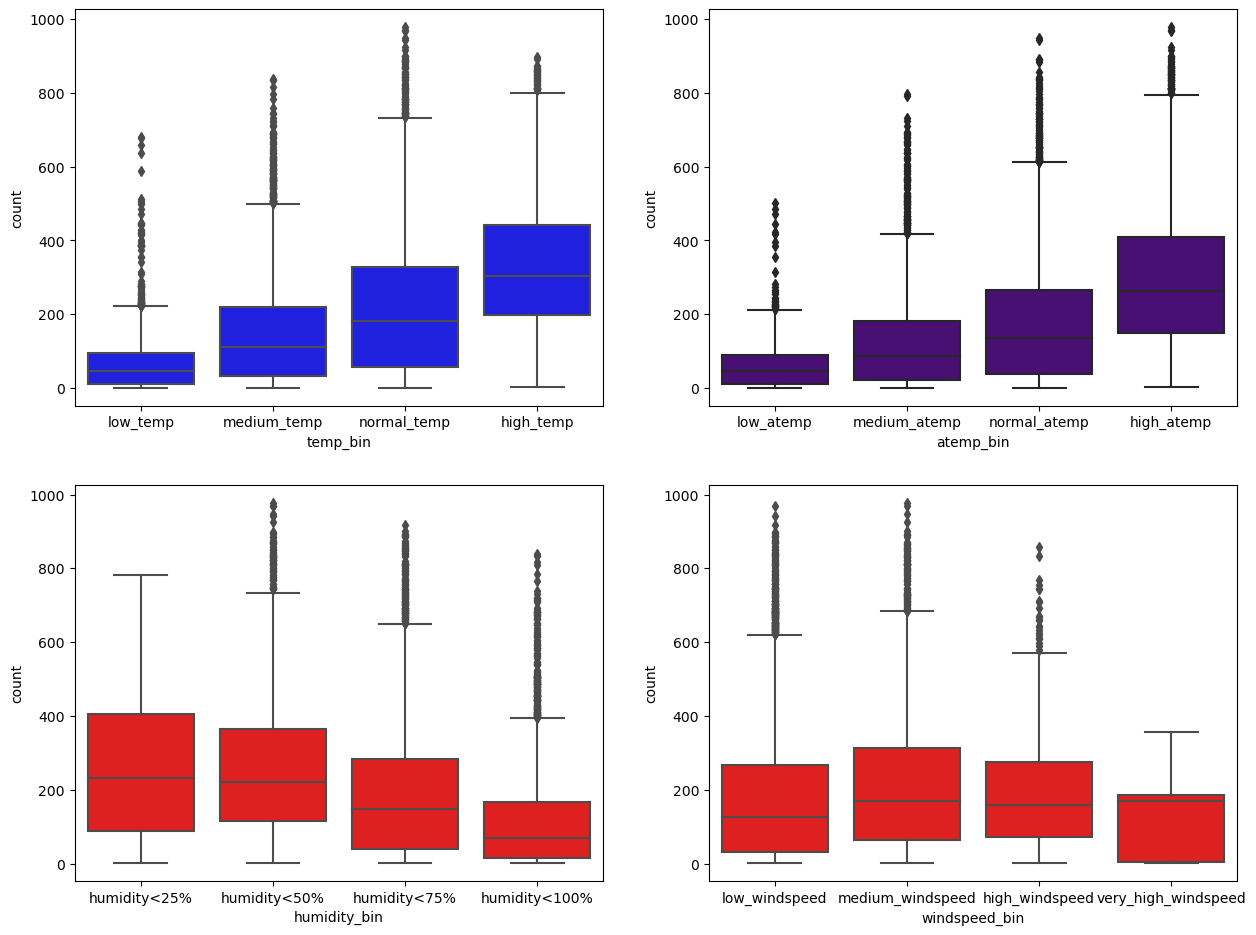

In [13]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=data, x="temp_bin",y='count',color="blue", ax=axis[0,0])
sns.boxplot(data=data, x="atemp_bin",y='count',color="indigo", ax=axis[0,1])
sns.boxplot(data=data, x="humidity_bin",y='count',color="red", ax=axis[1,0])
sns.boxplot(data=data, x="windspeed_bin",y='count',color="red", ax=axis[1,1])
plt.show()

* low_temp,low_atemp,humidity<100%,low_windspeed have more outliers.

## Chi-square test to check if Weather is dependent on the season 

### H0:Weather is Independent on season
### H1:Weather is dependent on season

In [10]:
df_ws = pd.crosstab(data.weather,data.season,margins=True,margins_name='Total')
df_ws

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
Total,2686,2733,2733,2734,10886


In [12]:
# Above weather 4 has less expected count so not include 4 
df_w=data[-(data['weather']==4)]

In [15]:
df_ws = pd.crosstab(df_w.weather,df_w.season,margins=True,margins_name='Total')
df_ws

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
Total,2685,2733,2733,2734,10885


In [17]:
stat,p_value,dof,expected = stats.chi2_contingency(df_ws)
stat,p_value,dof,expected

(46.10145731073249,
 6.664576536706683e-06,
 12,
 array([[ 1774.04869086,  1805.76352779,  1805.76352779,  1806.42425356,
          7192.        ],
        [  699.06201194,   711.55920992,   711.55920992,   711.81956821,
          2834.        ],
        [  211.8892972 ,   215.67726229,   215.67726229,   215.75617823,
           859.        ],
        [ 2685.        ,  2733.        ,  2733.        ,  2734.        ,
         10885.        ]]))

In [18]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : Weather is Independent on season  ')
else:
    print('We reject the Null Hypothesis : Weather is dependent on season ')

We reject the Null Hypothesis : Weather is dependent on season 


#### Weather is dependent on season

## Chi-square test to check if workingday is dependent on the season

### H0 = workingday is Independent on season
### H1 = workingday is dependent on season

In [21]:
#H0 = workingday is Independent on season
#H1 = workingday is dependent on season
df_count_season = pd.crosstab(data.workingday,data.season,margins=True,margins_name='Total')
df_count_season

season,1,2,3,4,Total
workingday,,,,,
0,858,840,888,888,3474
1,1828,1893,1845,1846,7412
Total,2686,2733,2733,2734,10886


In [22]:
stat,p_value,dof,expected = stats.chi2_contingency(df_count_season)
stat,p_value,dof,expected

(2.5708953973429574,
 0.9583429307736173,
 8,
 array([[  857.17104538,   872.16994305,   872.16994305,   872.48906853,
          3474.        ],
        [ 1828.82895462,  1860.83005695,  1860.83005695,  1861.51093147,
          7412.        ],
        [ 2686.        ,  2733.        ,  2733.        ,  2734.        ,
         10886.        ]]))

In [23]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : Workingday is Independent on season  ')
else:
    print('We reject the Null Hypothesis : Workingday is dependent on season ')

We Accept the Null Hypothesis : Workingday is Independent on season  


#### Workingday is Independent on season

## ANNOVA to check if No. of cycles rented is similar or different in different season

### H0 : count of bikes  is similar across various season
### Ha : count of bikes is different across various season

In [27]:
season_1 = data[data['season']==1]['count']
season_2 = data[data['season']==2]['count']
season_3 = data[data['season']==3]['count']
season_4 = data[data['season']==4]['count']

In [33]:
p_value = stats.f_oneway(season_1,season_2,season_3,season_4)
print("P-Value : ",p_value)

P-Value :  F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)


In [34]:
alpha = 0.05
if p_value[1] >= alpha: 
    print('We Accept the Null Hypothesis : count of bikes  is similar across various season ')
else:
    print('We reject the Null Hypothesis : count of bikes is different across various season ')

We reject the Null Hypothesis : count of bikes is different across various season 


#### Count of bikes is different across various season

## ANNOVA to check if No. of cycles rented is similar or different in different weather

### H0 : count of bikes  is similar across various weather
### Ha : count of bikes is different across various weather


In [35]:
weather_1 = data[data['weather']==1]['count']
weather_2 = data[data['weather']==2]['count']
weather_3 = data[data['weather']==3]['count']
weather_4 = data[data['weather']==4]['count']

In [36]:
p_value = stats.f_oneway(weather_1,weather_2,weather_3,weather_4)
print("P-Value : ",p_value)

P-Value :  F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)


In [32]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : count of bikes  is similar across various weather ')
else:
    print('We reject the Null Hypothesis : count of bikes is different across various weather ')

We reject the Null Hypothesis : count of bikes is different across various weather 


####  Count of bikes is different across various weather 

## Recommendations and Insights

* Season 3 have more number of users than other seasons.
* Holidays of season 3 have more number of users.
* Working days of season 3 have more number of users.
* For both weather 1,2 and 3 the more users belongs to season 3. For weather 4 more users belongs to season 1.
* Weather 1 have more users than others.
* More users prefer the temperature 36.08. The lowest number users comes for bikes is in the temperature 3.28
* More people use bikes when they feel 40.15 temperature.
* More people use bikes when the humidity level is in between the range 20 - 23
* More people prefer wind speed is greater than 50.
* There is huge increase in number of users in the year 2012.
* Number of users is highest in month June.
* Most and least mean users are in respective days are friday and sunday
* Both registerd and casual users are increse with increse in year in every seasons
